In [1]:
# set environment 

import os
import sys

root_path = os.path.abspath('../../')

megatron_path = os.path.join(root_path, 'mcore-features/thirdparty/Megatron-LM-20250414')

print('megatron_path:\t', megatron_path)

sys.path.append(megatron_path)
sys.path.append(os.path.join(megatron_path, 'examples/multimodal'))

import megatron
import megatron.core



megatron_path:	 /workspace/code/playbook/Multimodal-Playbook/mcore-features/thirdparty/Megatron-LM-20250414
[1744636208.404237] [8b8f367e01f9:34491:f]        vfs_fuse.c:281  UCX  ERROR inotify_add_watch(/tmp) failed: No space left on device


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
from megatron.energon import get_train_dataset, get_loader, WorkerConfig
from tqdm import tqdm

simple_worker_config = WorkerConfig(rank=0, world_size=1, num_workers=32)

data_path = '/workspace/data/mm/LLaVA-Pretrain/wds'

train_ds = get_train_dataset(
    data_path,
    batch_size=1,
    shuffle_buffer_size=None,
    max_samples_per_sequence=None,
    worker_config=simple_worker_config,
)

train_loader = get_loader(train_ds)

image_tokens_list = []
patch = 14

cnt = 0
# for batch in tqdm(train_loader):
#     w,h = batch.image.shape[-2:]
#     image_tokens = (w//patch)*(h//patch)
#     image_tokens_list.append(image_tokens)
#     if cnt == 499990:
#         break
#     cnt = cnt + 1

[1744637548.008477] [8b8f367e01f9:36200:f]        vfs_fuse.c:281  UCX  ERROR inotify_add_watch(/tmp) failed: No space left on device


/usr/local/lib/python3.10/dist-packages/megatron/energon/flavors/vqa.py:35: FutureWarning: <class 'megatron.energon.flavors.vqa.VQAWebdataset'> is deprecated, use the default instead and set the sample_type:
To convert, update your /workspace/data/mm/LLaVA-Pretrain/wds/.nv-meta/dataset.yaml to:
# remove top-level __module__ and __class__
sample_type:
  __module__: megatron.energon
  __class__: VQASample
# Keep the remaining content
  warn_deprecated(


rank=0, worker=0: shard_range=[pretrain-0.tar[0, 10000), pretrain-1.tar[0, 5625), ...<44>, pretrain-0.tar[0, 10000), pretrain-1.tar[0, 5625)] sum(count)=15625
rank=0, worker=1: shard_range=[pretrain-1.tar[5625, 10000), pretrain-10.tar[0, 10000), pretrain-11.tar[0, 1250), ...<44>, pretrain-1.tar[5625, 10000), pretrain-10.tar[0, 10000), pretrain-11.tar[0, 1250)] sum(count)=15625
rank=0, worker=2: shard_range=[pretrain-11.tar[1250, 10000), pretrain-12.tar[0, 6875), ...<44>, pretrain-11.tar[1250, 10000), pretrain-12.tar[0, 6875)] sum(count)=15625
rank=0, worker=3: shard_range=[pretrain-12.tar[6875, 10000), pretrain-13.tar[0, 10000), pretrain-14.tar[0, 2500), ...<44>, pretrain-12.tar[6875, 10000), pretrain-13.tar[0, 10000), pretrain-14.tar[0, 2500)] sum(count)=15625
rank=0, worker=4: shard_range=[pretrain-14.tar[2500, 10000), pretrain-15.tar[0, 8125), ...<44>, pretrain-14.tar[2500, 10000), pretrain-15.tar[0, 8125)] sum(count)=15625
rank=0, worker=5: shard_range=[pretrain-15.tar[8125, 10000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉| 499990/500000 [19:23<00:00, 429.59it/s]


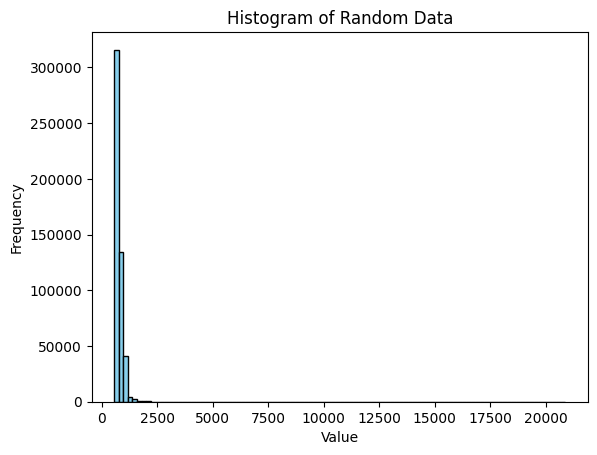

In [10]:
stat_path = 'llava_dataset_stat_list.npy'

import matplotlib.pyplot as plt
import numpy as np

# 生成随机数据
np.random.seed(42)
# data = np.array(image_tokens_list)

data = np.load(stat_path)
image_tokens_list = data.tolist()

# 绘制直方图
plt.hist(data, bins=100, color='skyblue', edgecolor='black')

# 设置图表标题和坐标轴标签
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 显示图表
plt.show()

In [11]:
np.save('llava_dataset_stat_list.npy', data)

In [19]:
image_tokens_dict = {}
for item in image_tokens_list:
    if item in image_tokens_dict:
        image_tokens_dict[item] += 1
    else:
        image_tokens_dict[item] = 1
        
image_tokens_dict = {key: image_tokens_dict[key] for key in sorted(image_tokens_dict.keys())}

image_tokens_dict_morethan2 = {key: value for key, value in image_tokens_dict.items() if value >= 2}
image_tokens_dict_morethan5 = {key: value for key, value in image_tokens_dict.items() if value >= 5}

In [20]:
len(image_tokens_dict)

186

In [21]:
print(len(image_tokens_dict_morethan2))
print(len(image_tokens_dict_morethan5))

136
105


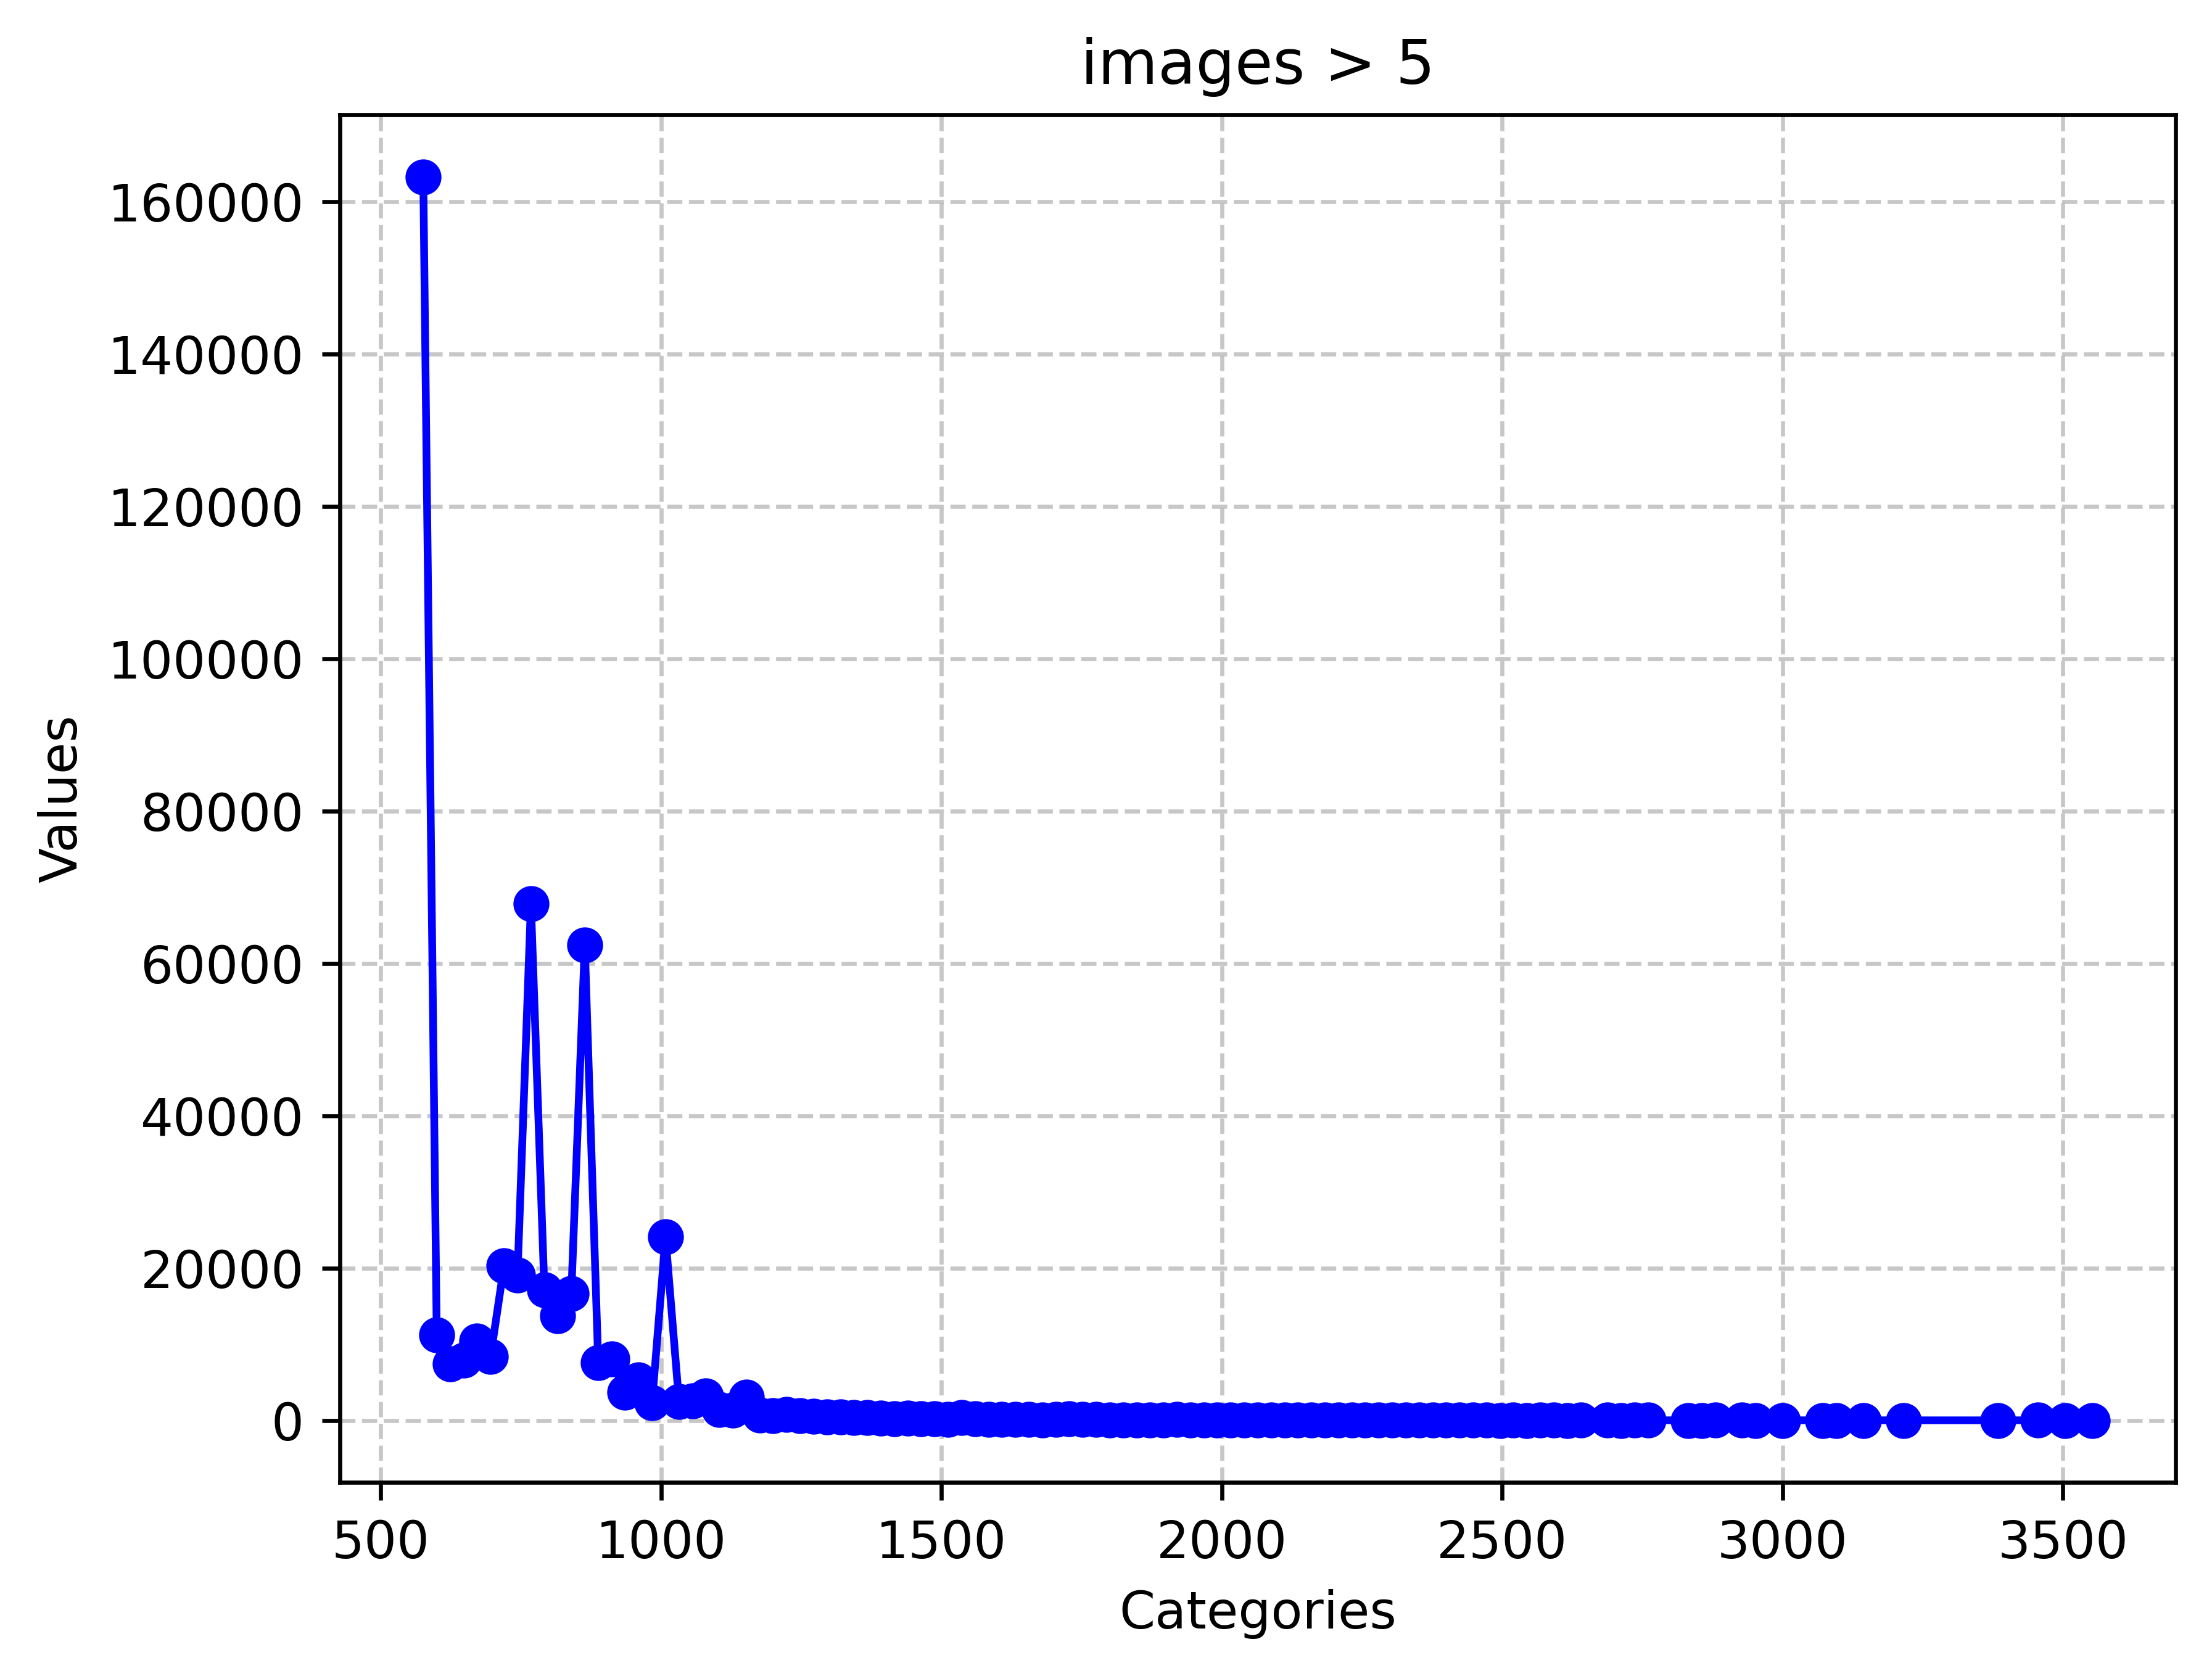

In [30]:
import matplotlib.pyplot as plt

# 示例字典
data_dict = image_tokens_dict_morethan5

# 提取字典的键和值
keys = list(data_dict.keys())
values = list(data_dict.values())

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 600

# 绘制点线图
plt.plot(keys, values, marker='o', linestyle='-', color='b')

# # 添加数据标签
# for i in range(len(keys)):
#     plt.text(keys[i], values[i], str(values[i]), ha='center', va='bottom')

# 设置图表标题和坐标轴标签
plt.title('images > 5')
plt.xlabel('Categories')
plt.ylabel('Values')

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图表
plt.show()

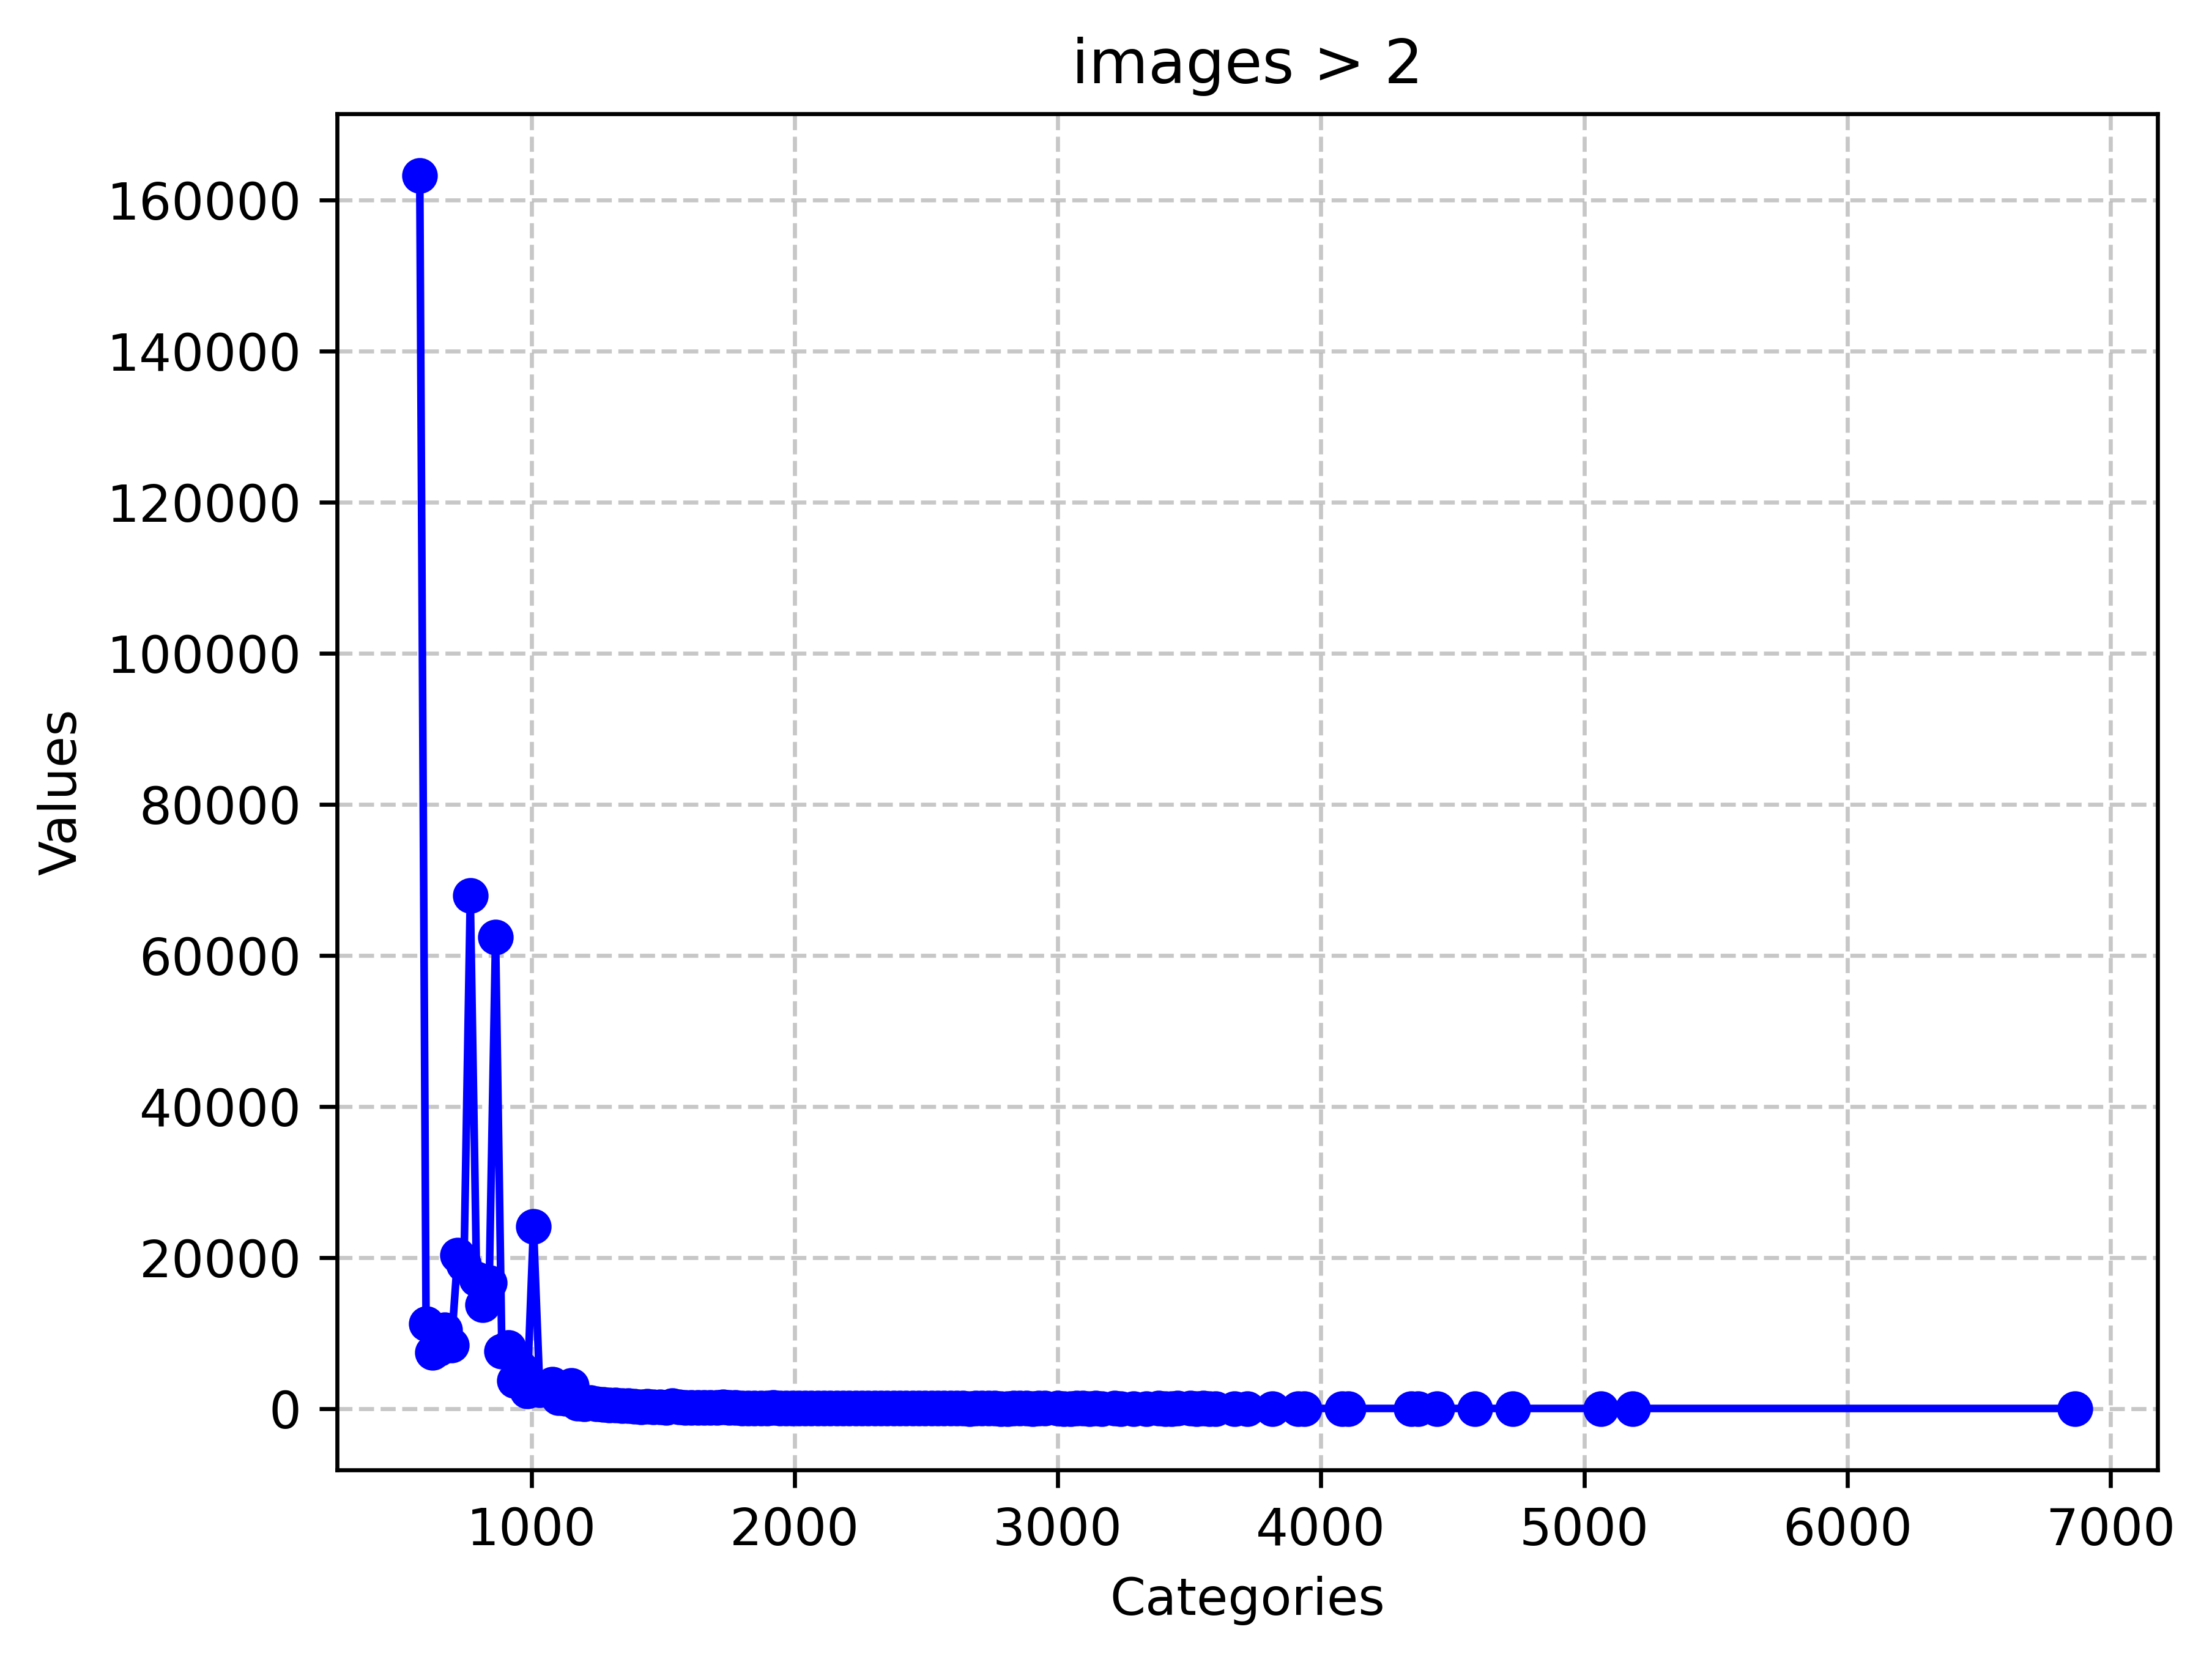

In [31]:
# 示例字典
data_dict = image_tokens_dict_morethan2

# 提取字典的键和值
keys = list(data_dict.keys())
values = list(data_dict.values())

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 600

# 绘制点线图
plt.plot(keys, values, marker='o', linestyle='-', color='b')

# # 添加数据标签
# for i in range(len(keys)):
#     plt.text(keys[i], values[i], str(values[i]), ha='center', va='bottom')

# 设置图表标题和坐标轴标签
plt.title('images > 2')
plt.xlabel('Categories')
plt.ylabel('Values')

# 显示网格线
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图表
plt.show()